**Problem 1 - Data Read, Write and Inspect:**

---
**Complete all following Task:**

• Dataset for the Task: **"bank.csv"**
1. Load the provided dataset and import in pandas DataFrame.


2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

4. Read ”banknumericdata.csv” and Find the summary statistics.


In [1]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()


Saving bank.csv to bank.csv


In [2]:
# Loading the dataset
df = pd.read_csv("bank.csv")

print(df.head())

# Get info about DataFrame
print(df.info())

# Columns with dtype object
object_cols = df.select_dtypes(include='object').columns
print("Object columns:", object_cols)

# Unique values in object columns
for col in object_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Total number of null values in each column
print("\nNull values in each column:")
print(df.isnull().sum())

# Drop object columns
df_numeric = df.drop(columns=object_cols)

# Save to new CSV
df_numeric.to_csv("banknumericdata.csv", index=False)

# Read numeric CSV
df_numeric_read = pd.read_csv("banknumericdata.csv")

# Summary statistics
print(df_numeric_read.describe())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

**Problem 2 - Data Imputations:**

---


Complete all the following Task:

• Dataset for the Task: **"medical_student.csv"**

1. Load the provided dataset and import in pandas DataFrame.

2. Check info of the DataFrame and identify column with missing (null) values.

3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.

{Hint: dataset.duplicated.sum()}

In [3]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving medical_students_dataset.csv to medical_students_dataset.csv


In [4]:
# Read the uploaded CSV
df = pd.read_csv(io.BytesIO(uploaded['medical_students_dataset.csv']))

# Check first 5 rows
print(df.head())

# Check info
print(df.info())

# Count missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Fill missing numeric values with mean
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled missing values in {col} with mean")

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in {col} with mode")

# Check duplicate rows
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()
print("Duplicates removed (if any).")

print("\nFinal dataset info:")
print(df.info())

print("\nFirst 5 rows after imputations:")
print(df.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (t

/tmp/ipython-input-3461543005.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3461543005.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Filled missing values in Blood Type with mode
Filled missing values in Diabetes with mode
Filled missing values in Smoking with mode
Total duplicate rows: 12572
Duplicates removed (if any).

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 187428 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      187428 non-null  float64
 1   Age             187428 non-null  float64
 2   Gender          187428 non-null  object 
 3   Height          187428 non-null  float64
 4   Weight          187428 non-null  float64
 5   Blood Type      187428 non-null  object 
 6   BMI             187428 non-null  float64
 7   Temperature     187428 non-null  float64
 8   Heart Rate      187428 non-null  float64
 9   Blood Pressure  187428 non-null  float64
 10  Cholesterol     187428 non-null  float64
 11  Diabetes        187428 non-null  object 
 12  Smoking         187428 non-null  o

**3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"**

**Problem - 1:**

---


Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [5]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [6]:
df = pd.read_csv("Titanic-Dataset.csv")

# Create subset of required columns
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Keep only first-class passengers
first_class = subset[subset['Pclass'] == 1]

# Calculate statistics of Fare
mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Maximum Fare:", max_fare)
print("Minimum Fare:", min_fare)

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


**Problem - 2:**

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [7]:
# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Subset required columns
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter first-class passengers
first_class = subset[subset['Pclass'] == 1]

# Count null values in Age
null_count = first_class['Age'].isnull().sum()
print("Number of null values in Age:", null_count)

# Drop rows with null Age
first_class_cleaned = first_class.dropna(subset=['Age'])

print("\nNumber of rows after dropping null Age values:", len(first_class_cleaned))
print(first_class_cleaned.head())


Number of null values in Age: 30

Number of rows after dropping null Age values: 186
                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  


**Problem - 3:**

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:

• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [8]:
df = pd.read_csv("Titanic-Dataset.csv")

# One-hot encode the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# add these dummy columns to the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# Print first few rows to verify
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


**Problem - 4:**

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean survival rates:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


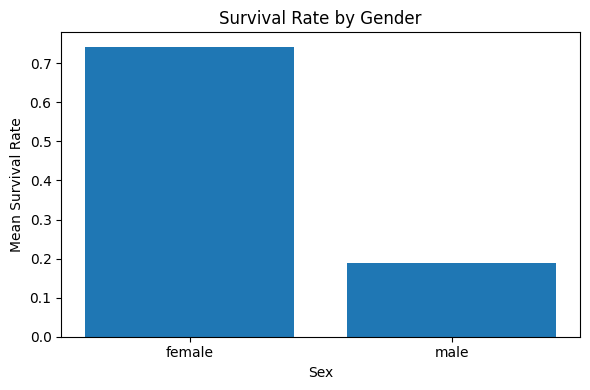

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Read uploaded file
df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))

# Calculate mean survival rate by gender
survival_rates = df.groupby("Sex")["Survived"].mean()

print("Mean survival rates:\n", survival_rates)

# Plot
plt.figure(figsize=(6,4))
plt.bar(survival_rates.index, survival_rates.values)
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Gender")
plt.tight_layout()
plt.show()


**Problem - 5:**

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Survival rate by embarkation port:
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


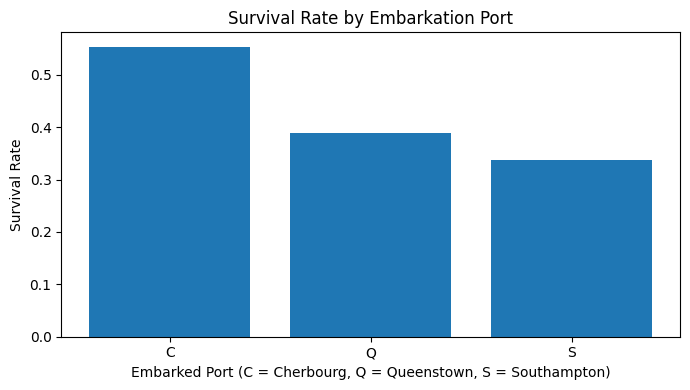

In [10]:
df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))

# Drop rows where Embarked is missing
df = df.dropna(subset=['Embarked'])

# Calculate survival rate by Embarked port
survival_by_port = df.groupby('Embarked')['Survived'].mean()

print("Survival rate by embarkation port:\n", survival_by_port)

# Plot
plt.figure(figsize=(7,4))
plt.bar(survival_by_port.index, survival_by_port.values)
plt.xlabel("Embarked Port (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Embarkation Port")
plt.tight_layout()
plt.show()

**Problem - 6{Optional}:**

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

Age groups created:
AgeGroup
Q1    164
Q4    144
Q5    142
Q2    137
Q3    127
Name: count, dtype: int64

Survival Rates Table:
Pclass           1         2         3
AgeGroup                              
Q1        0.809524  0.742857  0.333333
Q2        0.761905  0.400000  0.197674
Q3        0.666667  0.416667  0.283582
Q4        0.777778  0.461538  0.166667
Q5        0.506667  0.363636  0.088235


/tmp/ipython-input-2846865368.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_table = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()


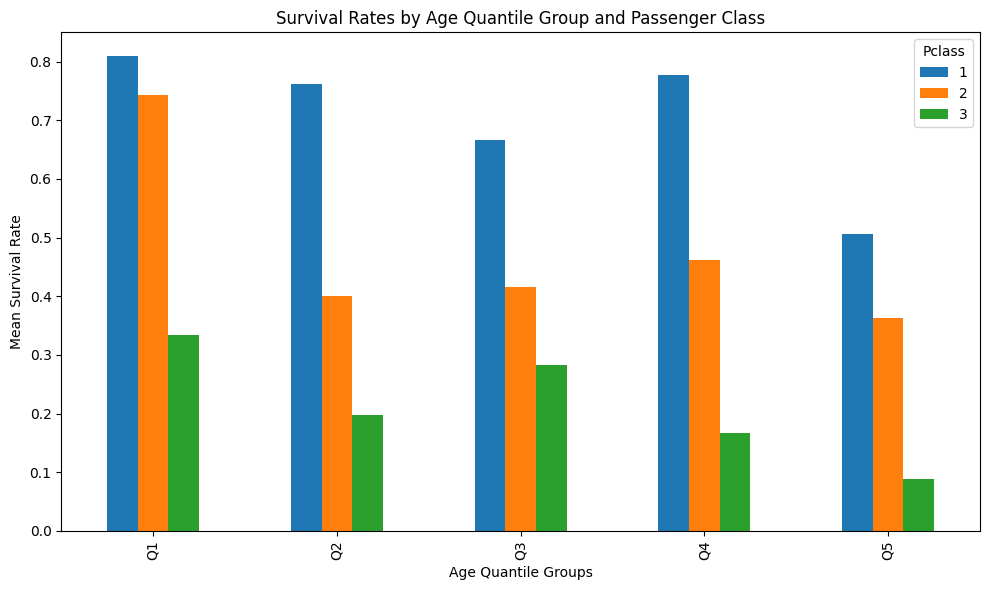

In [11]:
df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))

# Drop rows with missing Age
df = df.dropna(subset=['Age'])

# Create 5 quantile-based age groups
df['AgeGroup'] = pd.qcut(df['Age'], 5, labels=['Q1','Q2','Q3','Q4','Q5'])

print("Age groups created:")
print(df['AgeGroup'].value_counts())

# Calculate survival rate by AgeGroup and Pclass
survival_table = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()

print("\nSurvival Rates Table:")
print(survival_table)

survival_table.plot(kind='bar', figsize=(10,6))
plt.title("Survival Rates by Age Quantile Group and Passenger Class")
plt.xlabel("Age Quantile Groups")
plt.ylabel("Mean Survival Rate")
plt.legend(title="Pclass")
plt.tight_layout()
plt.show()